In [199]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [157]:
data = pd.read_csv('E:projectKNN\heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
2,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
3,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
4,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [158]:
#count how many have disease or not 1=yes 0=no
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

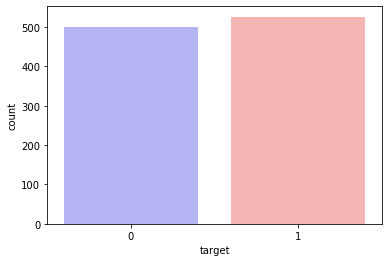

In [159]:

#visualize result
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

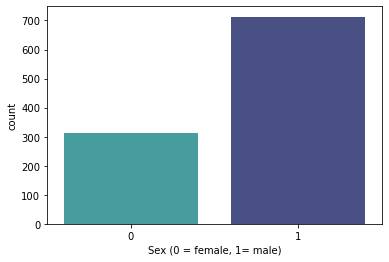

In [160]:
#male female visualize 
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

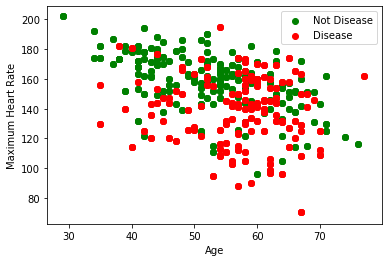

In [161]:
#relation between “Maximum Heart Rate” and “Age”
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'red')
plt.legend(["Not Disease", "Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [162]:
#label dataset with X(matrix of independent variables) and y(vector of the dependent variable)
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

In [163]:
# here i have used  min Max scaler rather than standardScaler
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x=minmax.fit(X).transform(X)
x

array([[0.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [1.        , 1.        , 0.        , ..., 1.        , 0.75      ,
        0.66666667],
       [1.        , 1.        , 0.        , ..., 1.        , 0.75      ,
        0.66666667],
       [1.        , 1.        , 0.        , ..., 1.        , 0.75      ,
        0.66666667]])

In [164]:
#split data into 75% for train 25% for test
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size = 0.25, random_state=0)
#print(y_test)   testing for showing reson behind using random state

In [165]:
# # normalize or feature scaling
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# X_train

# Scaling

In [166]:
# finding maximum and minimum value of each feature
# i just find the 'chol' feature max and min for understanding how can we find out the max and min for each features .
maximum=(data.loc[data['chol'].idxmax()])['chol']
minimum=(data.loc[data['chol'].idxmin()])['chol']
print(maximum,minimum)


564.0 126.0


# formula of min-max scaler

In [167]:
# scaling range is 0 to 1
# low=0
# high=1
# scaled_x = (x-min(x)/max(x)-min(x))*((high-low)+low)

In [168]:
max_x={}
min_x={}
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
for i in range(len(features)):
    max_x[features[i]]=data.loc[data[features[i]].idxmax()][features[i]]
    min_x[features[i]]=data.loc[data[features[i]].idxmin()][features[i]]
print(max_x)
print(min_x)

{'age': 77.0, 'sex': 1.0, 'cp': 3.0, 'trestbps': 200.0, 'chol': 564.0, 'fbs': 1.0, 'restecg': 2.0, 'thalach': 202.0, 'exang': 1.0, 'oldpeak': 6.2, 'slope': 2.0, 'ca': 4.0, 'thal': 3.0}
{'age': 29.0, 'sex': 0.0, 'cp': 0.0, 'trestbps': 94.0, 'chol': 126.0, 'fbs': 0.0, 'restecg': 0.0, 'thalach': 71.0, 'exang': 0.0, 'oldpeak': 0.0, 'slope': 0.0, 'ca': 0.0, 'thal': 0.0}


In [169]:
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

def scaled_input(raw_input):
    return [((raw_input[i]-min_x[features[i]])/(max_x[features[i]]-min_x[features[i]]))*((1-0)+0) for i in range(len(raw_input))]

# here you have to plug your input_features , and after running this cell it will be scaled and stored in final_input variable.
raw_input=[35,1,0,120,198,0,1,130,1,1.6,1,0,3]

final_input=scaled_input(raw_input)
print(final_input)

[0.125, 1.0, 0.0, 0.24528301886792453, 0.1643835616438356, 0.0, 0.5, 0.45038167938931295, 1.0, 0.25806451612903225, 0.5, 0.0, 1.0]


# check accuracy of KNN

In [170]:
#train data with KNN model
#for k=10 accuracy will be
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


In [171]:
classifier.predict([final_input])        #output prediction of KNN

array([0], dtype=int64)

# Confusion matrix & precission for KNN

In [172]:
#so here we can see for k=10 we find the most accuracy of 88% 
#now use confusion matrix for testing how many records tested corecctly
#confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for KNN:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix for KNN:
[[113  16]
 [ 15 113]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       128
           1       0.88      0.88      0.88       129

    accuracy                           0.88       257
   macro avg       0.88      0.88      0.88       257
weighted avg       0.88      0.88      0.88       257



# Decission TREE Prediction

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

clf.predict([[35,1,0,120,198,0,1,130,1,1.6,1,0,3]])

array([0], dtype=int64)

# Accuracy of Decission TREE


In [174]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.99


# Confusion matrix & precission for Deccison TREE

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix:
[[129   0]
 [  3 125]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.98      1.00      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



# Prediction of Random Forest

In [215]:
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
from sklearn.model_selection import train_test_split
clfr=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfr.fit(X_train,y_train)

# prediction on test set
y_pred=clfr.predict(X_test)

clfr.predict([[35,1,0,120,198,0,1,130,1,1.6,1,0,3]])

array([0], dtype=int64)

# Accuracy of Random Forest

In [216]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:{:.2f}".format(accuracy))

Accuracy:0.99


# Confusion matrix & precission for Random Forest

In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix of random forest:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix of random forest:
[[107   0]
 [  3  95]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.97      1.00      0.98        95

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Adaboost


In [218]:
#adaboost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # 70% training and 30% test

# prediction of Adaboost

In [246]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=20, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
print('prediction result of ADAboost')
model.predict([[35,1,0,120,198,0,1,130,1,1.6,1,0,3]])

prediction result of ADAboost


array([0], dtype=int64)

# Accuracy of Adaboost

In [247]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
y_pred = model.predict(X_test)
print("Accuracy of adaboost:",metrics.accuracy_score(y_test, y_pred))
print()
print('Accuracy for training set for Random Forest = {}'.format((cm[0][0] + cm[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm[0][0] + cm[1][1])/len(y_test)))

Accuracy of adaboost: 0.8341463414634146

Accuracy for training set for Random Forest = 0.20609756097560974
Accuracy for test set for Random Forest = 0.824390243902439


# confusion matrix & precission of Adaboost

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix ada boost:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix ada boost:
[[85 22]
 [12 86]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.88      0.80      0.83       108

    accuracy                           0.83       205
   macro avg       0.84      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



# logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# prediction of Logistic Regression

In [250]:
y_pred=lr.predict(X_test)
lr.predict([[35,1,0,126,282,0,0,156,1,0,2,0,2]])

array([0], dtype=int64)

# confusion matrix & precission of logistic Regression 

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix logistic regresion:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix logistic regresion:
[[115  40]
 [ 12 141]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       127
           1       0.92      0.78      0.84       181

    accuracy                           0.83       308
   macro avg       0.83      0.84      0.83       308
weighted avg       0.85      0.83      0.83       308



# Accuracy of Logistic Regression

In [252]:
print("Accuracy of LR:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy of LR: 0.8311688311688312
Precision: 0.7790055248618785
Recall: 0.9215686274509803


# Support Vector Machine SVM

In [253]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

# prediction of SVM

In [254]:
from sklearn import svm
#Create a svm Classifier
clfs = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clfs.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clfs.predict(X_test)
clfs.predict([[35,1,0,126,282,0,0,156,1,0,2,0,2]])

array([0], dtype=int64)

# Accuracy of SVM

In [255]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8599221789883269
Precision: 0.8299319727891157
Recall: 0.9172932330827067


# Confusion matrix & precission of SVM

In [256]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix SVM:\n%s" % confusion_matrix)
print(classification_report(y_pred,y_test))

Confusion matrix SVM:
[[ 99  25]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.92      0.83      0.87       147

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



# Naive Bayes 

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [280]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Accuracy of Naive bayes

In [281]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [282]:
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8451219512195122
Accuracy for test set for Naive Bayes = 0.824390243902439


# prediction of naive bayes

In [283]:
 classifier.predict([[35,1,0,120,198,0,1,130,1,1.6,1,0,3]])


array([0], dtype=int64)

In [284]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [285]:

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [286]:
y_pred_train = xg.predict(X_train)

In [287]:
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0

In [288]:
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for XGBoost = 0.9841463414634146
Accuracy for test set for XGBoost = 0.9463414634146341


In [289]:
xg.predict([[35,1,0,120,198,0,1,130,1,1.6,1,0,3]])

array([0], dtype=int64)

In [290]:
print("Confusion matrix XGboost:\n%s" % confusion_matrix)

Confusion matrix XGboost:
<function confusion_matrix at 0x0000019AB1F829D0>
